# Examples of using basic tools like NumPy, Pandas, etc.
From the book "Python for Algorithmic Trading"

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
np.random.seed(1000)
raw = np.random.standard_normal((10, 3)).cumsum(axis=0)
index = pd.date_range('2022-1-1', periods=len(raw), freq='M')
columns = ['no1', 'no2', 'no3']
df = pd.DataFrame(raw, index=index, columns=columns)
df

,no1,no2,no3
2022-01-31,-0.804458,0.320932,-0.025483
2022-02-28,-0.160134,0.020135,0.363992
2022-03-31,-0.267572,-0.459848,0.959027
2022-04-30,-0.732239,0.207433,0.152912
2022-05-31,-1.928309,-0.198527,-0.029466
2022-06-30,-1.825116,-0.336949,0.676227
2022-07-31,-0.553321,-1.323696,0.341391
2022-08-31,-0.652803,-0.916504,1.260779
2022-09-30,-0.340685,0.616657,0.710605
2022-10-31,-0.723832,-0.206284,2.310688


<AxesSubplot:>

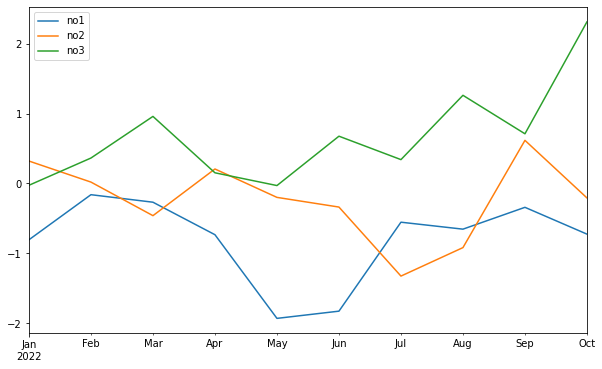

In [3]:
df.plot(figsize=(10, 6))

# Case Study

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
spx = pd.DataFrame(raw['.SPX'])
spx.info()
vix = pd.DataFrame(raw['.VIX'])
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .VIX    2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [3]:
spxvix = pd.DataFrame(spx).join(vix)
spxvix.info()
spxvix.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2516 non-null   float64
 1   .VIX    2516 non-null   float64
dtypes: float64(2)
memory usage: 123.5 KB


,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


In [4]:
spxvix = pd.merge(spx, vix, left_index=True, right_index=True)
spxvix.info()
spxvix.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2516 non-null   float64
 1   .VIX    2516 non-null   float64
dtypes: float64(2)
memory usage: 123.5 KB


,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


In [5]:
spxvix = pd.DataFrame({'SPX': spx['.SPX'], 'VIX': vix['.VIX']}, index=spx.index)
spxvix.info()
spxvix.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     2516 non-null   float64
 1   VIX     2516 non-null   float64
dtypes: float64(2)
memory usage: 123.5 KB


,SPX,VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

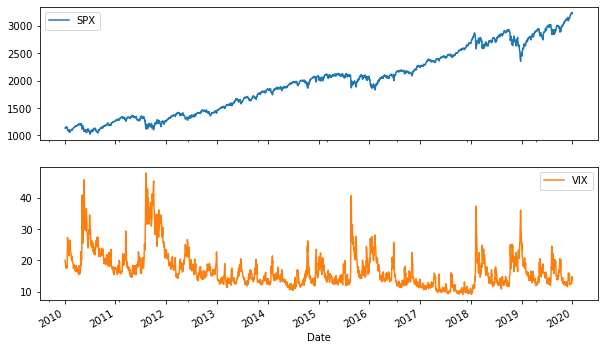

In [12]:
spxvix.plot(figsize=(10, 6), subplots=True)

In [23]:
rets = np.log(spxvix / spxvix.shift(1))
rets = rets.dropna()
rets

,SPX,VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514
...,...,...
2019-12-24,-0.000195,0.004747
2019-12-26,0.005115,-0.001580
2019-12-27,0.000034,0.059834


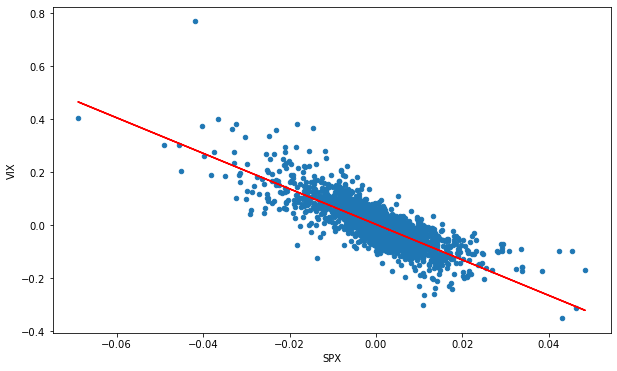

In [26]:
rg = np.polyfit(rets['SPX'], rets['VIX'], 1)
rets.plot(figsize=(10, 6), kind='scatter', x='SPX', y='VIX', style='.')
plt.plot(rets['SPX'], np.polyval(rg, rets['SPX']), 'r-');

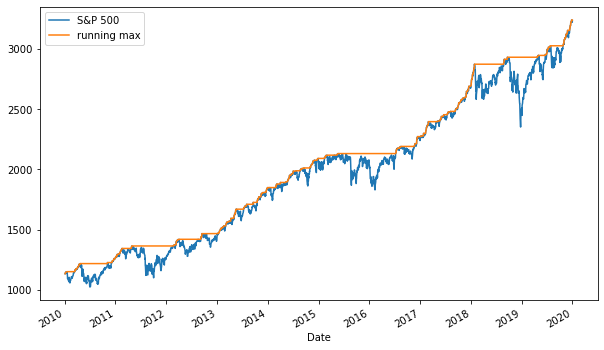

In [27]:
plt.figure(figsize=(10, 6))
spxvix['SPX'].plot(label='S&P 500')
spxvix['SPX'].cummax().plot(label='running max')
plt.legend(loc=0)

<AxesSubplot:xlabel='Date'>

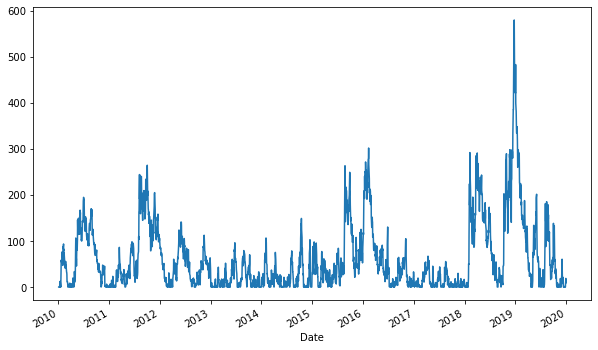

In [31]:
adrawdown = spxvix['SPX'].cummax() - spxvix['SPX']
adrawdown.plot(figsize=(10, 6), label='absolute max drawdown')